In [ ]:
import os
import numpy as np
import pandas as pd
labels = os.listdir('F:/M_M/Research/Sign Recognition/resized/Train')
print(labels)

['Bad', 'Beautiful', 'Friend', 'Good', 'House', 'Me', 'My', 'Request', 'Skin', 'Urine', 'You']



 BAD


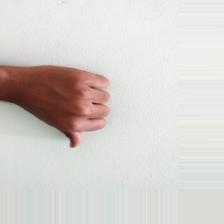

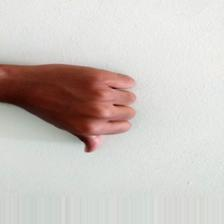

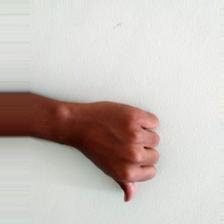

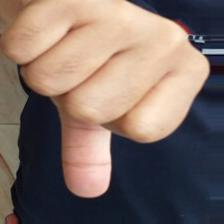

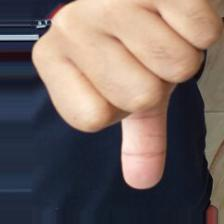

there are  392  images in  Bad class

 BEAUTIFUL


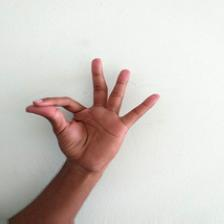

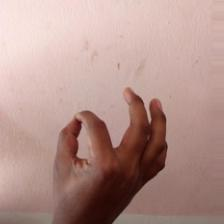

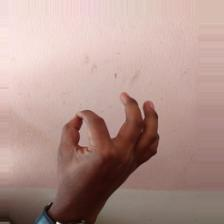

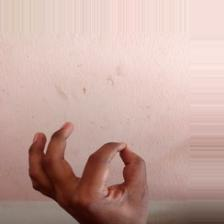

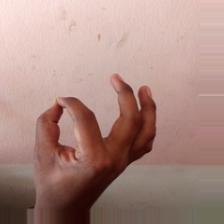

there are  390  images in  Beautiful class

 FRIEND


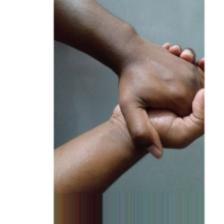

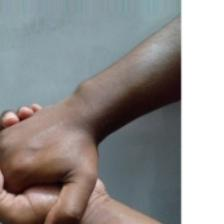

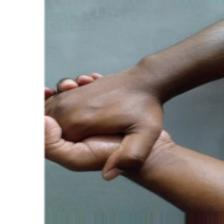

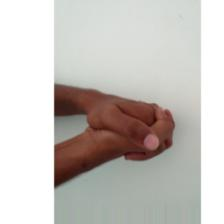

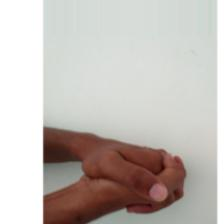

there are  355  images in  Friend class

 GOOD


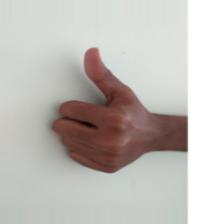

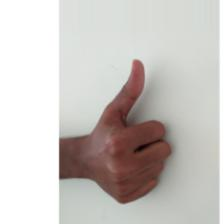

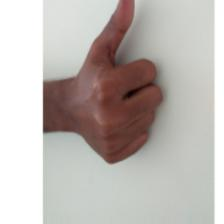

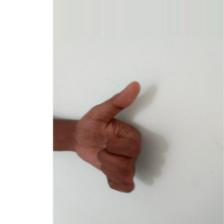

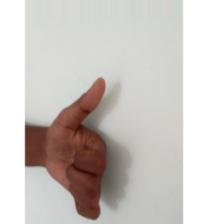

there are  444  images in  Good class

 HOUSE


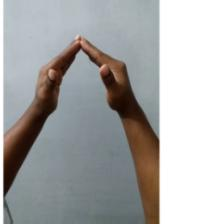

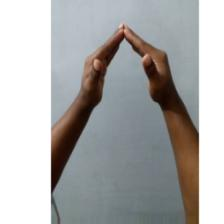

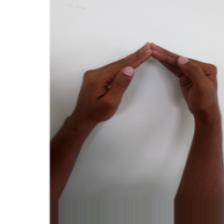

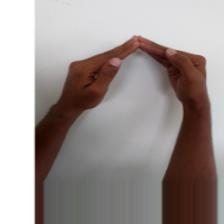

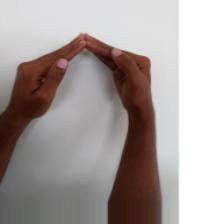

there are  341  images in  House class

 ME


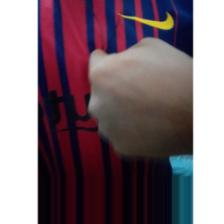

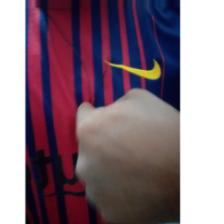

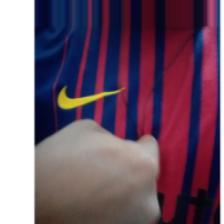

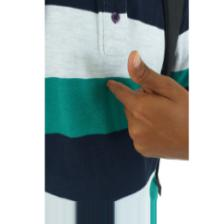

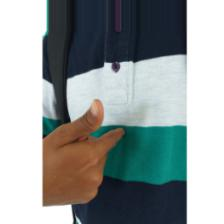

there are  344  images in  Me class

 MY


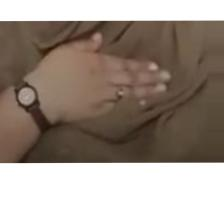

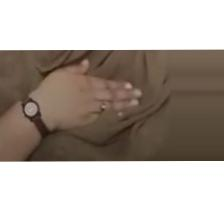

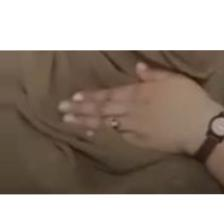

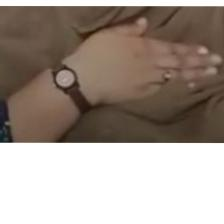

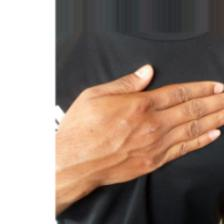

there are  297  images in  My class

 REQUEST


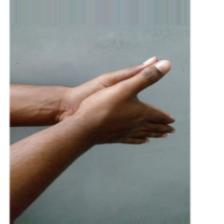

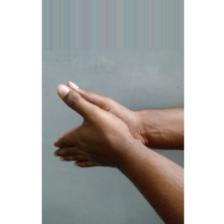

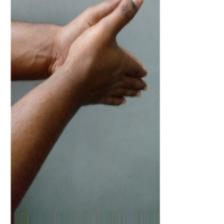

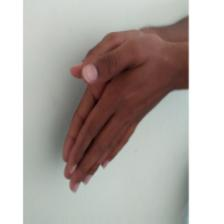

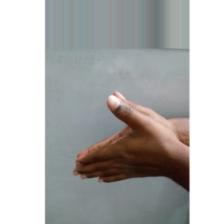

there are  297  images in  Request class

 SKIN


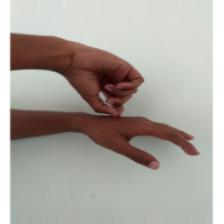

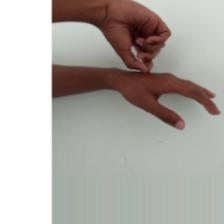

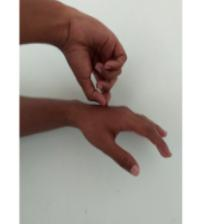

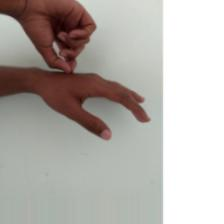

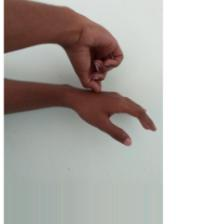

there are  292  images in  Skin class

 URINE


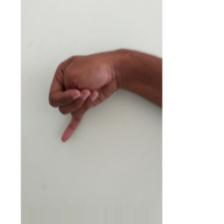

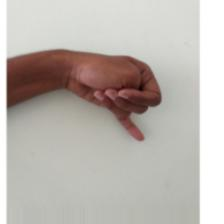

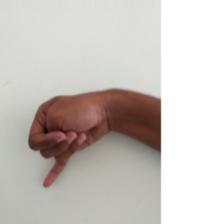

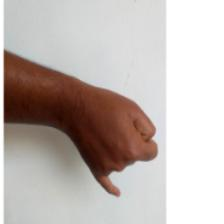

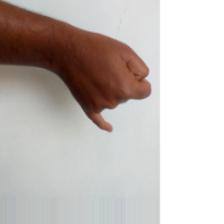

there are  337  images in  Urine class

 YOU


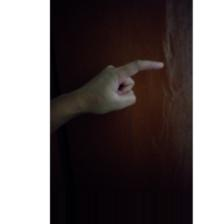

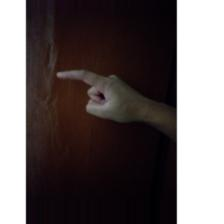

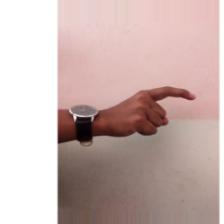

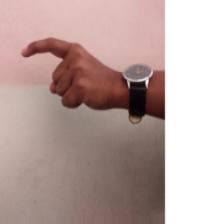

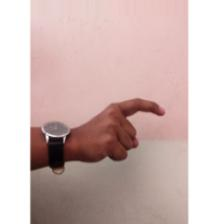

there are  346  images in  You class


In [ ]:
from IPython.display import Image, display
num = []
for label in labels:
    path = 'F:/M_M/Research/Sign Recognition/resized/Train/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        if k < 5:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')

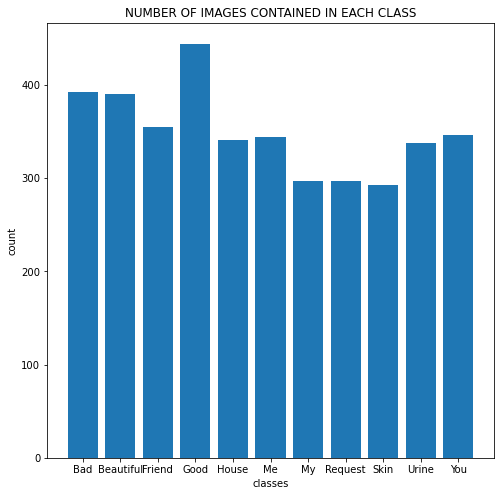

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()


In [ ]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = 'F:/M_M/Research/Sign Recognition/resized/Train/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (3835, 32, 32, 3) and that of Y is:  (3835,)


In [ ]:
x_data

array([[[[228, 231, 229],
         [229, 232, 230],
         [228, 230, 230],
         ...,
         [229, 232, 230],
         [229, 232, 230],
         [229, 232, 230]],

        [[228, 231, 229],
         [229, 232, 230],
         [230, 232, 232],
         ...,
         [234, 237, 235],
         [234, 237, 235],
         [234, 237, 235]],

        [[227, 229, 229],
         [228, 230, 230],
         [231, 233, 233],
         ...,
         [233, 236, 234],
         [234, 237, 235],
         [234, 237, 235]],

        ...,

        [[212, 213, 211],
         [209, 214, 212],
         [206, 209, 207],
         ...,
         [214, 219, 217],
         [214, 219, 217],
         [214, 219, 217]],

        [[212, 213, 211],
         [209, 214, 212],
         [206, 209, 207],
         ...,
         [214, 219, 217],
         [214, 219, 217],
         [214, 219, 217]],

        [[212, 213, 211],
         [209, 214, 212],
         [206, 209, 207],
         ...,
         [214, 219, 217],
        

In [ ]:
x_data = x_data.astype('float32')/255


In [ ]:
x_data

array([[[[0.89411765, 0.90588236, 0.8980392 ],
         [0.8980392 , 0.9098039 , 0.9019608 ],
         [0.89411765, 0.9019608 , 0.9019608 ],
         ...,
         [0.8980392 , 0.9098039 , 0.9019608 ],
         [0.8980392 , 0.9098039 , 0.9019608 ],
         [0.8980392 , 0.9098039 , 0.9019608 ]],

        [[0.89411765, 0.90588236, 0.8980392 ],
         [0.8980392 , 0.9098039 , 0.9019608 ],
         [0.9019608 , 0.9098039 , 0.9098039 ],
         ...,
         [0.91764706, 0.92941177, 0.92156863],
         [0.91764706, 0.92941177, 0.92156863],
         [0.91764706, 0.92941177, 0.92156863]],

        [[0.8901961 , 0.8980392 , 0.8980392 ],
         [0.89411765, 0.9019608 , 0.9019608 ],
         [0.90588236, 0.9137255 , 0.9137255 ],
         ...,
         [0.9137255 , 0.9254902 , 0.91764706],
         [0.91764706, 0.92941177, 0.92156863],
         [0.91764706, 0.92941177, 0.92156863]],

        ...,

        [[0.83137256, 0.8352941 , 0.827451  ],
         [0.81960785, 0.8392157 , 0.83137256]

In [ ]:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)

In [ ]:
y_encoded

array([ 0,  0,  0, ..., 10, 10, 10], dtype=int64)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

In [ ]:
y_categorical


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

In [ ]:
len(X),len(Y)

(3835, 3835)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [ ]:
# Initialing the CNN
#from tensorflow_core.python.keras.api.keras import optimizers
import tensorflow as tf
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation

#Kernel = zeros --> No change in weights... like vanishing gradient problem
#kernel = random --> Performs better but when you rerun the experiment the results may vary quite a bit, depends on the application. 
#kernel = he_uniform --> Ideal to work with relu. 
#kernel = glorot_uniform --> similar to he_uniform but different variance. he_uniform is preferred with ReLu

classifier =  Sequential()

# Step 1 - Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=3, padding="same", input_shape=(32, 32, 3), activation='relu'))

# step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

# Adding second convolution layer
classifier.add(Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

# Adding 3rd Convolution Layer
classifier.add(Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'))
classifier.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full Connection
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=11, activation='softmax'))

# Compiling The CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)         

In [ ]:
#fitting the model
history = classifier.fit(X_train, Y_train, epochs=150, validation_split=0.2,initial_epoch=100)

Epoch 101/150
65/65 [==============================] - 2s 28ms/step - loss: 0.0488 - accuracy: 0.9859 - val_loss: 0.9172 - val_accuracy: 0.7724
Epoch 102/150
65/65 [==============================] - 2s 27ms/step - loss: 0.0305 - accuracy: 0.9878 - val_loss: 0.9444 - val_accuracy: 0.7899
Epoch 103/150
65/65 [==============================] - 2s 28ms/step - loss: 0.0394 - accuracy: 0.9844 - val_loss: 0.9060 - val_accuracy: 0.7860
Epoch 104/150
65/65 [==============================] - 2s 28ms/step - loss: 0.0418 - accuracy: 0.9883 - val_loss: 0.9261 - val_accuracy: 0.7743
Epoch 105/150
65/65 [==============================] - 2s 30ms/step - loss: 0.0594 - accuracy: 0.9820 - val_loss: 0.9094 - val_accuracy: 0.7568
Epoch 106/150
65/65 [==============================] - 2s 27ms/step - loss: 0.0408 - accuracy: 0.9864 - val_loss: 0.8368 - val_accuracy: 0.7977
Epoch 107/150
65/65 [==============================] - 2s 27ms/step - loss: 0.0489 - accuracy: 0.9835 - val_loss: 0.9101 - val_accuracy:

In [ ]:
classifier.save('my_model2AgainTry3_79acc.h5')


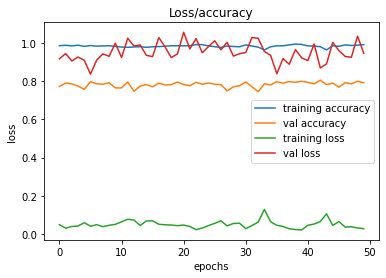

In [ ]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
Y_pred = classifier.predict(X_test)
Y_pred = np.argmax(Y_pred,axis=1)
Y_pred

array([7, 0, 9, ..., 2, 6, 0], dtype=int64)

In [ ]:
Y_test = np.argmax(Y_test, axis = 1)


In [ ]:
Y_test


array([7, 0, 9, ..., 2, 6, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))

the accuracy obtained on the test set is: 0.8467614533965245


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       112
           1       0.89      0.98      0.93       138
           2       0.80      0.86      0.83       100
           3       0.82      0.84      0.83       154
           4       0.97      0.94      0.95       118
           5       0.72      0.87      0.79       114
           6       0.87      0.78      0.82       103
           7       0.77      0.62      0.69        99
           8       0.92      0.86      0.89       106
           9       0.76      0.76      0.76        99
          10       0.91      0.78      0.84       123

    accuracy                           0.85      1266
   macro avg       0.85      0.84      0.84      1266
weighted avg       0.85      0.85      0.85      1266



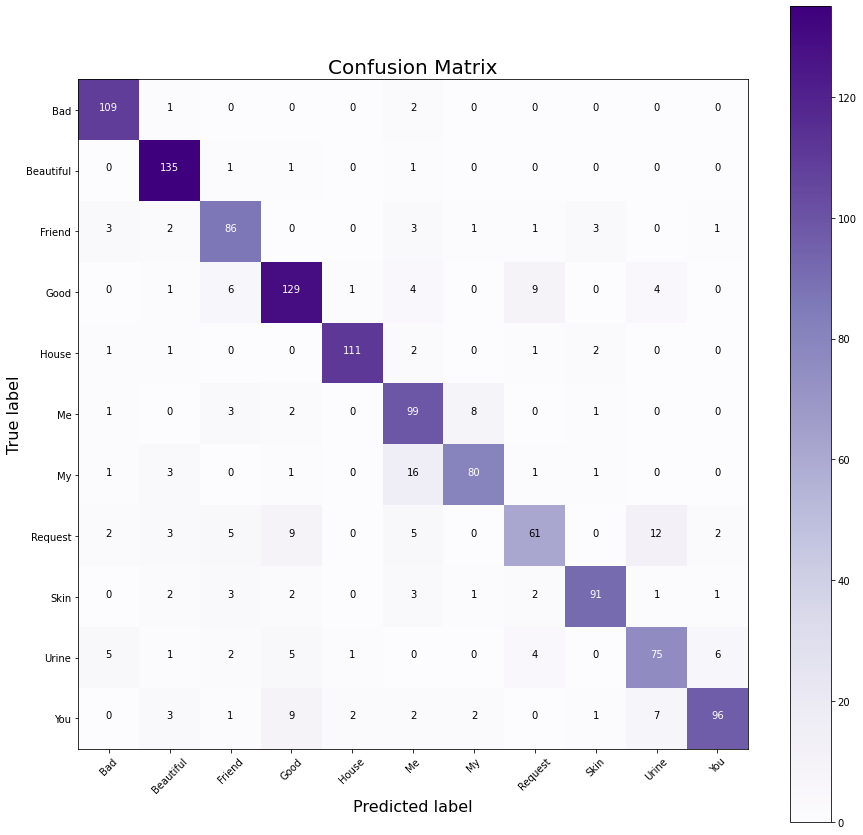

In [ ]:
def plot_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 15))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = classifier.predict(X_test, batch_size = 32, verbose = 0)
plot_confusion_matrix(Y_test, Y_pred)